In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Data Collection
df1=pd.read_csv('/content/SMS_train (1) (1).csv',encoding='ISO-8859-1')
df2=pd.read_csv('/content/SMS_test (2) (1).csv',encoding='ISO-8859-1')
df1

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df=pd.concat([df1,df2],axis=0)
df.reset_index(drop=True,inplace=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.5+ KB


In [ ]:
df.isna().sum()

,0
S. No.,0
Message_body,0
Label,0


In [ ]:
df.duplicated().sum()

0

<Axes: xlabel='Label'>

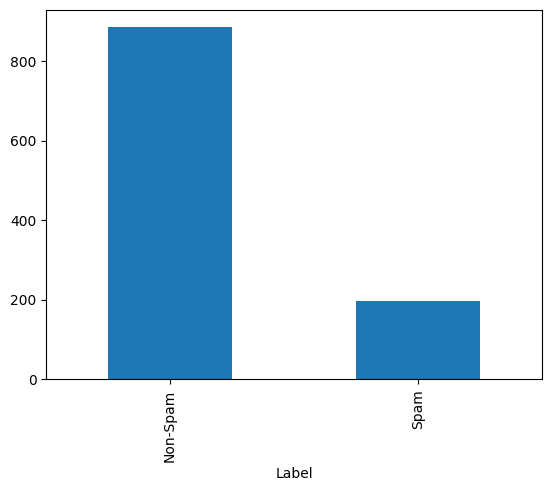

In [ ]:
df['Label'].value_counts().plot(kind='bar')

In [ ]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [ ]:
df.drop('S. No.',axis=1,inplace=True)

In [ ]:
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
# df.rename(columns={'Message':'message','Label':'label'},inplace=True)
df['Label']=df['Label'].map({'Spam':1,'Non-Spam':0})
df

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1078,Try to do something dear. You read something f...,0
1079,Sun ah... Thk mayb can if dun have anythin on....,0
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",0


In [ ]:
df.dtypes

,0
Message_body,object
Label,int64


In [ ]:
msg=df['Message_body']
msg

,Message_body
0,Rofl. Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity, * was in mood for that. So...any other s..."
3,Will ü b going to esplanade fr home?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear. You read something f...
1079,Sun ah... Thk mayb can if dun have anythin on....
1080,"SYMPTOMS when U are in love: ""1.U like listeni..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:word_tokenize(x)).apply(lambda x:' '.join(x))
msg

,Message_body
0,Rofl . Its true to its name
1,The guy did some bitching but I acted like i '...
2,"Pity , * was in mood for that . So ... any oth..."
3,Will ü b going to esplanade fr home ?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear . You read something ...
1079,Sun ah ... Thk mayb can if dun have anythin on...
1080,SYMPTOMS when U are in love : `` 1.U like list...


In [ ]:
# remove special characters
import re
msg=msg.str.replace('[^a-zA-Z0-9]',' ',regex=True)
msg

,Message_body
0,Rofl Its true to its name
1,The guy did some bitching but I acted like i ...
2,Pity was in mood for that So any oth...
3,Will b going to esplanade fr home
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear You read something ...
1079,Sun ah Thk mayb can if dun have anythin on...
1080,SYMPTOMS when U are in love 1 U like list...


In [ ]:
# collect meaningful words
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:' '.join([i for i in word_tokenize(x) if len(i)>=3]))
msg

,Message_body
0,Rofl Its true its name
1,The guy did some bitching but acted like inter...
2,Pity was mood for that any other suggestions
3,Will going esplanade home
4,This the 2nd time have tried contact have won ...
...,...
1077,wonders WORLD 7th You 6th style 5th smile 4th ...
1078,Try something dear You read something for exams
1079,Sun Thk mayb can dun have anythin Thk have boo...
1080,SYMPTOMS when are love like listening songs ge...


In [ ]:
# stemming
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps=PorterStemmer()
msg=msg.apply(lambda x:[ps.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:" ".join(x))
msg

,Message_body
0,rofl it true it name
1,the guy did some bitch but act like interest b...
2,piti wa mood for that ani other suggest
3,will go esplanad home
4,thi the 2nd time have tri contact have won the...
...,...
1077,wonder world 7th you 6th style 5th smile 4th p...
1078,tri someth dear you read someth for exam
1079,sun thk mayb can dun have anythin thk have boo...
1080,symptom when are love like listen song get sto...


In [ ]:
# Remove stop words
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
stop_words = stopwords.words('english')
msg=msg.apply(lambda x:" ".join([i for i in word_tokenize(x) if i not in stop_words]))
msg

,Message_body
0,rofl true name
1,guy bitch act like interest buy someth els nex...
2,piti wa mood ani suggest
3,go esplanad home
4,thi 2nd time tri contact 750 pound prize claim...
...,...
1077,wonder world 7th 6th style 5th smile 4th perso...
1078,tri someth dear read someth exam
1079,sun thk mayb dun anythin thk book lesson pilat...
1080,symptom love like listen song get stop see nam...


In [ ]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x=vector.fit_transform(msg)
x

<1082x2870 sparse matrix of type '<class 'numpy.float64'>'
	with 9052 stored elements in Compressed Sparse Row format>

In [ ]:
y=df['Label'].values
x.dtype


dtype('float64')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train

<757x2870 sparse matrix of type '<class 'numpy.float64'>'
	with 6260 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
gnb=BernoulliNB()
lst=[knn,svc,rfc,dtc,gnb]
for i in lst:
  print(f'Model is {i}')
  print("*************")
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(f'Accuracy is {accuracy_score(y_test,y_pred)}')
  print(f'classification report is {classification_report(y_test,y_pred)}')

Model is KNeighborsClassifier()
*************
Accuracy is 0.8061538461538461
classification report is               precision    recall  f1-score   support

           0       0.80      1.00      0.89       260
           1       1.00      0.03      0.06        65

    accuracy                           0.81       325
   macro avg       0.90      0.52      0.48       325
weighted avg       0.84      0.81      0.73       325

Model is SVC()
*************
Accuracy is 0.8861538461538462
classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.93       260
           1       1.00      0.43      0.60        65

    accuracy                           0.89       325
   macro avg       0.94      0.72      0.77       325
weighted avg       0.90      0.89      0.87       325

Model is RandomForestClassifier()
*************
Accuracy is 0.9230769230769231
classification report is               precision    recall  f1-score   support

